### Import Statements

In [15]:
import pandas as pd # alias for pandas - for file reading
import numpy as np # alias for numpy - for mathematical calculations
from sklearn.cluster import KMeans # for finding number of clusters
from matplotlib import pyplot as plt # for visualization
import seaborn as sns # for boxplot

### Reading the Data Set for EDA
Exploratory Data Analysis (EDA) is an essential step in the data analysis process. It involves visually and statistically exploring and summarizing datasets to:


1. Understand data distribution and patterns.
2. Identify relationships and correlations.
3. Detect outliers and anomalies.
4. Formulate hypotheses for further analysis.


EDA typically involves:

Visualizations:
1. Histograms and density plots for distribution analysis.
2. Scatter plots and heatmaps for relationship exploration.
3. Bar charts and box plots for categorical data analysis.


EDA Tools:
1. Pandas and NumPy for data manipulation.
2. Matplotlib and Seaborn for visualization.
3. Scikit-learn for statistical analysis.

In [16]:
file=pd.read_csv("Customers_Info.csv") # reading the data set into a csv file
data=pd.DataFrame(file) # converting csv file to Data Frame

In [17]:
data.info() # getting information of data types and null values for features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [18]:
data.head() # Reading the first five values of Data Frame

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [19]:
data.tail()  # Reading the last five values of Data Frame

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

### Outlier Detection

Outlier detection in machine learning refers to the process of identifying data points that significantly deviate from the norm or pattern of the dataset. These data points are called outliers or anomalies.

Types of Outliers:

1. Point Outliers: Individual data points that are far away from the rest of the data.
2. Contextual Outliers: Data points that are abnormal only in specific contexts or conditions.
3. Collective Outliers: Groups of data points that are anomalous together.

Method for Outlier Detection Used:
        =>Box Plot Method

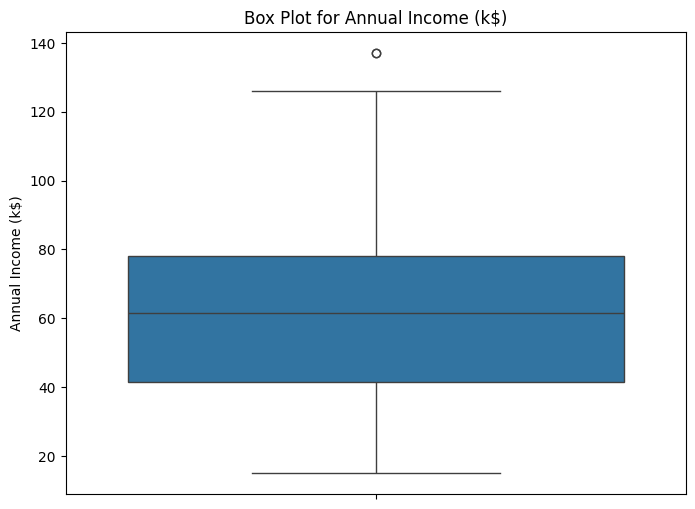

In [20]:
plt.figure(figsize=(8,6))
sns.boxplot(y=data['Annual Income (k$)']) # finding the outlier value
plt.title("Box Plot for Annual Income (k$)")
plt.show()

### Detecting and Handling Null Values

In [21]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [22]:
data.drop(columns=["CustomerID"],inplace=True) # dropping the CustomerID column because it will not effect the output

In [23]:
data.shape # finding the number of rows and columns 

(200, 4)

In [24]:
data.info() # getting information of data types and null values for features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [25]:
X=data.iloc[:,[2,3]].values # Selecting features

### Finding the Optimum Number of Clusters by Elbow Method
The Elbow Method is a visual technique used to determine the optimal number of clusters (K) in K-Means clustering. It's based on the idea that the distortion (or sum of squared errors) decreases as the number of clusters increases, but at some point, the rate of decrease becomes less significant.


How to apply the Elbow Method:

1. Perform K-Means clustering for various values of K (e.g., 1 to 10).
2. Calculate the distortion (sum of squared errors) for each K.
3. Plot the distortion against K.
4. Identify the "elbow point" where the rate of decrease in distortion becomes less significant that gives the optimum number of clusters.

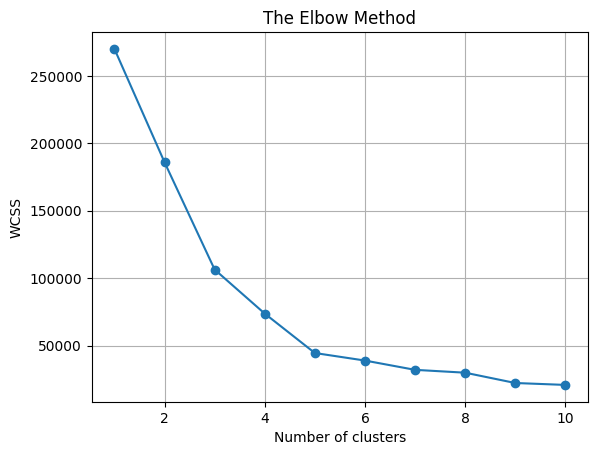

In [26]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++' ,random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,'o-')
plt.grid(True)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Fitting the K-means Model

In [27]:
kmeans = KMeans(n_clusters = 5,init='k-means++' , random_state=0)
y_kmeans= kmeans.fit_predict(X) # Fitting the kmeans model and Predicting the cluster 
print(y_kmeans)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


### Taking User Input

In [29]:
user_input={"Annual Income (k$)":[int(input("Enter the Annual Income in k$:"))],
            "Spending Score (1-100)":[int(input("Enter Spending Score (between 1 to 100)"))]}
df=pd.DataFrame(user_input) # Converting the user_input dictionary to DataFrame

Enter the Annual Income in k$: 45
Enter Spending Score (between 1 to 100) 60


In [30]:
user_predict=kmeans.predict(df.values) # Predicting the cluster for user input
print(f"Predicted Cluster:{user_predict[0]+1}")

Predicted Cluster:1


### Visualization 
Visualization in machine learning (ML) is the process of creating graphical representations of data and model performance to better understand and improve ML models
1. Insight generation: Visualizations help identify patterns, relationships, and trends in data.
2. Model interpretation: Visualizations explain complex models and their decisions.
3. Communication: Visualizations facilitate understanding among stakeholders.
4. Debugging: Visualizations identify errors and areas for improvement.


Types of Visualizations:

1. Data Visualization:
    
2. Model Visualization:
   
3. Performance Visualization:
    
Tools for Visualization:

1. Matplotlib
2. Seaborn

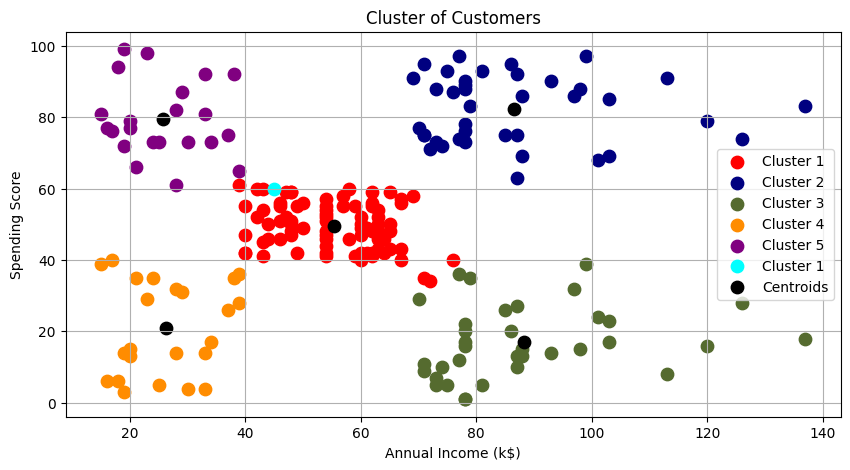

In [31]:
plt.figure(figsize=(10,5))
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=80, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=80, c='navy', label='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=80, c='darkolivegreen', label='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=80, c='darkorange', label='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=80, c='purple', label='Cluster 5')
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"],s=80,c='cyan',label=f'Cluster {user_predict[0]+1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=80, c='black', label='Centroids')
plt.title('Cluster of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.grid(True)
plt.legend()
plt.show()

### K-Means Scatter Plot
A Cluster Scatter Plot is a visualization tool that displays:
Key Aspects:

1. Data Points: Individual data points are represented as dots or points on the plot.
2. Clusters: Groups of similar data points are identified and highlighted using different colors, shapes, or sizes.
3. Centroids: The center point of each cluster is often marked with a distinct symbol (e.g., ×, +, or).

Information Depicted:

1. Cluster Structure: The plot reveals the underlying structure of the data, including:
    - Density of points within clusters.
    - Separation between clusters.
    - Outliers or anomalies.
2. Cluster Characteristics: The plot helps identify:
    - Cluster size (number of points).
    - Cluster shape (e.g., spherical, elliptical).
    - Cluster density (e.g., sparse, dense).
3. Relationships: The plot can show:
    - Relationships between variables (e.g., correlations).
    - Patterns or trends within clusters.

Tools for Creating Cluster Scatter Plots:

1. Matplotlib
2. Seaborn